**Description**:

Compute the figure 3 of the article: Duration of foraging behavior periods grouped in intervals of 25 min.

-------------------------------------------------------------------------
Author: Luciano Martinez Rau (Mid Sweden University - sinc(<i>i</i>)-CONICET)
-----------------------------------------------------------------------

In [1]:
def interval(label,duration):
  if label == "Grazing":
    interval_grazing.append(duration)
  elif  label == "Rumination":
    interval_rumination.append(duration)
  elif ((label == "Barn") or (label == "Put on the device") or (label == "Take off the device")):
    interval_barn.append(duration)

  return interval_grazing,interval_rumination,interval_barn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.wavfile import read
import scipy.io
import scipy
import numpy as np
import glob
import os

!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apach

**Specify the path of the label files**

In [3]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/drive',force_remount=True)
    directory = '/drive/MyDrive/Colab Notebooks/DatabaseMichigan/data/labels_behaviors'
    path_save_figures = "/drive/MyDrive/Colab Notebooks/DatabaseMichigan/fig/"
else:
    directory = 'data/labels_behaviors'
    path_save_figures = 'fig/'

Mounted at /drive


<ipython-input-10-279d1059b45c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[2][idx] ="Barn"


Text(0, 0.5, 'Periods [count]')

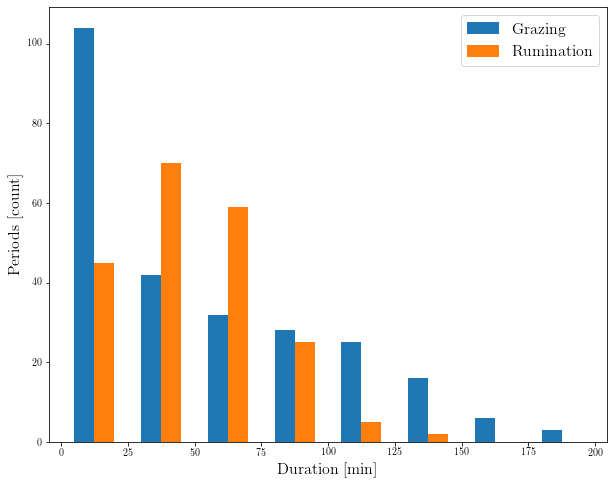

In [10]:
interval_rumination, interval_grazing, interval_barn = [] , [], []

duration_last_label= 0
last_segment_label = None
FilesLabels = sorted(list(glob.glob(os.path.join(directory,'*.txt'))))
flag_joint_label=False
for files in FilesLabels:
  df = pd.read_csv(files,sep='\t',engine='python',header=None,index_col=False)
  for idx in df.index:
    if ((df[2][idx] == "Put on the device") or (df[2][idx] == "Take off the device")):
      df[2][idx] ="Barn"

    #normal cases
    if idx>0 and idx < df[2].size-1:
      interval_grazing,interval_rumination,interval_barn = interval(df[2][idx] , df[1][idx] - df[0][idx]) 

    elif idx==0 and files.endswith('_1.txt'):
      interval_grazing,interval_rumination,interval_barn = interval(last_segment_label , duration_last_label)
      interval_grazing,interval_rumination,interval_barn = interval(df[2][idx] , df[1][idx] - df[0][idx]) 

    #Special case: last label of the file
    elif idx == df[2].size-1:
      last_segment_label = df[2][idx]
      duration_last_label= df[1][idx] - df[0][idx]
      flag_joint_label = True

    #Special case: compare if continue the previous activity
    elif idx==0 and not(files.endswith('_1.txt')):
      if (df[0][idx] == 0) and (df[2][idx] == last_segment_label): #yes case: same activity
        interval_grazing,interval_rumination,interval_barn = interval(df[2][idx] , df[1][idx] - df[0][idx]+ duration_last_label)
      else: #no case: different activity
        interval_grazing,interval_rumination,interval_barn = interval(last_segment_label , duration_last_label)
        interval_grazing,interval_rumination,interval_barn = interval(df[2][idx] , df[1][idx] - df[0][idx])
      flag_joint_label = False

    else:
      print("error")


intervals_pastoreo = np.array(interval_grazing)/60
intervals_rumination = np.array(interval_rumination)/60
intervals_barn = np.array(interval_barn)/60

plt.rcParams["figure.figsize"] = 12,8
plt.rcParams['text.usetex'] = True
font = {'family':'serif', 'serif': ['computer modern roman'],'size' : 13}
plt.rc('font',**font)

bins=np.linspace(0, 200, num=9)
intervals= np.array([intervals_pastoreo,intervals_rumination],dtype="object")
plt.hist(intervals,bins,rwidth = 0.6, align='left',label=['Grazing','Rumination'])
plt.xticks(np.arange(0, 200, step=25),['0 - 25', '25 - 50', '50 - 75', '75 - 100','100 - 125','125 - 150','150 - 175','175 - 200'])
plt.legend(loc='upper right',fontsize=16)
plt.xlabel("Duration [min]",fontsize=16)
plt.ylabel("Periods [count]",fontsize=16)

In [5]:
plt.savefig(path_save_figures + 'histogram_activity_segment.jpg', dpi = 600,transparent=True)
plt.savefig(path_save_figures + 'histogram_activity_segment.pdf', dpi = 600,transparent=True)

<Figure size 720x576 with 0 Axes>